<a href="https://colab.research.google.com/github/GlauOrla/NPL/blob/main/Trabalho%20Final%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Criar um classificador de chamados aplicando técnicas de PLN**
---

A **DinDinAgora** tem um canal de atendimento via chat e precisa classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para algum uma área especialista no assunto para uma melhor tratativa.​

Crie um modelo classificador de assuntos aplicando técnicas de PLN, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do modelo seu modelo.​

O modelo precisar atingir um score na **métrica F1 Score superior a 75%**. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Composição da nota:​**

**50%** - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)​

**50%** - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com  a Métrica F1 Score). **Separar o pipeline completo do modelo campeão conforme template.​**

**[1] = ​https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv**

Obs.: Para a métrica F1 Score, usar o parâmetro average = 'weighted'.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [1]:
# CARREGANDO O DATA FRAME
import pandas as pd
df = pd.read_csv('https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv', delimiter=';')

# Façam o download do arquivo e utilizem localmente durante os testes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


In [3]:
df.head()

,id_reclamacao,data_abertura,categoria,descricao_reclamacao
0,3229299,2019-05-01T12:00:00-05:00,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo..."
1,3199379,2019-04-02T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...
2,3233499,2019-05-06T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...
3,3180294,2019-03-14T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti..."
4,3224980,2019-04-27T12:00:00-05:00,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos..."


Bom desenvolvimento!

### Explorando a coluna categoria

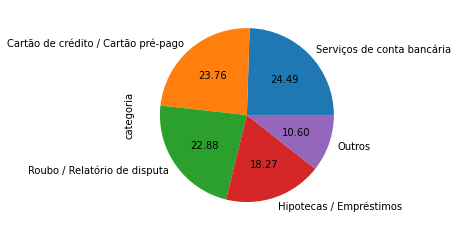

In [16]:
df['categoria'].value_counts().plot.pie(autopct='%.2f')

In [9]:
#Nota-se que os valores estão razoavelmente equilibrados
print(df.categoria.value_counts())

Serviços de conta bancária             5161
Cartão de crédito / Cartão pré-pago    5006
Roubo / Relatório de disputa           4822
Hipotecas / Empréstimos                3850
Outros                                 2233
Name: categoria, dtype: int64


In [12]:
#Aqui criaremos uma nova coluna com a classicação numerica representando cada item da categoria 
classificacao = df['categoria'].replace([
    'Serviços de conta bancária', 'Cartão de crédito / Cartão pré-pago', 'Roubo / Relatório de disputa', 'Hipotecas / Empréstimos', 'Outros'], [0, 1, 2, 3, 4])
df['classificacao'] = classificacao
df.head()

,id_reclamacao,data_abertura,categoria,descricao_reclamacao,classificacao
0,3229299,2019-05-01T12:00:00-05:00,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo...",3
1,3199379,2019-04-02T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...,1
2,3233499,2019-05-06T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...,1
3,3180294,2019-03-14T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti...",1
4,3224980,2019-04-27T12:00:00-05:00,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos...",0


In [13]:
# Excluindo as colunas que não iremos precisar e estabelecendo a 'id_reclamacao' como index
df = df.drop(columns=['data_abertura'])
df = df.set_index('id_reclamacao')
df.head()

,categoria,descricao_reclamacao,classificacao
id_reclamacao,,,
3229299,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo...",3
3199379,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...,1
3233499,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...,1
3180294,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti...",1
3224980,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos...",0


#Nomalizando o dataset
###Eliminando as palavras desnecessarias

In [20]:
#Removendo os 'x' da coluna 'descricao_reclamacao'
df['descricao_reclamacao'] = df['descricao_reclamacao'].str.replace('x', '')

In [21]:
#E agora os espaços em branco
df['descricao_reclamacao'] = df['descricao_reclamacao'].str.strip()

In [22]:
df.head()

,categoria,descricao_reclamacao,classificacao
id_reclamacao,,,
3229299,Hipotecas / Empréstimos,"Bom dia, meu nome é e agradeço se você puder...",3
3199379,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão em //2018 e fui informa...,1
3233499,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em //2019. No enta...,1
3180294,Cartão de crédito / Cartão pré-pago,"Em //2018, enquanto tentava reservar um ticket...",1
3224980,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos...",0


In [23]:
#Removendo os espaços em branco e as pontuações através da tokenização
from nltk import tokenize
tk_punct = tokenize.WordPunctTokenizer()
tk_esp_bra = tokenize.WhitespaceTokenizer()

In [59]:
#Criando uma lista de Pontuação
from string import punctuation
p_list = list()
extras = ['//', 'x', 'xx', 'xxx', 'xxxx', '{', '}', '$', '{$']
for p in punctuation:
  p_list.append(p)
for q in extras:
  p_list.append(q)
print(p_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '//', 'x', 'xx', 'xxx', 'xxxx', '{', '}', '$', '{$']


In [60]:
#Criando agora uma lista com os Stopwords em Portugues
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
#Em seguida, criaremos uma noma coluna como resultado da função que remove pontuação e stopwords
#As palavras também serão convertidas em caixa baixa
pontuacao_stopwords = p_list + stop_words
processando = []
for r in df['descricao_reclamacao']:
  nova_lista = []
  r = r.lower()
  token_text = tk_punct.tokenize(r)
  for w in token_text:
    if w not in pontuacao_stopwords:
      nova_lista.append(w)
  processando.append(' '.join(nova_lista))

df['normalizacao'] = processando

In [ ]:
!pip install unidecode

In [62]:
#Ainda falta remover os acentos da coluna normalizada
import unidecode
sem_acentos = [unidecode.unidecode(texto) for texto in df['normalizacao']]
sem_acentos[1]

'atualizei cartao 2018 informado agente fez atualizacao data aniversario mudaria virou agente dando informacoes erradas atualizar conta alterou data aniversario consentimento gravacao agente enganou'

In [63]:
#Adicionando osstopwords sem acento a lista de stopwords
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
df['normalizacao'] = sem_acentos

processando_2 = []
for r in df['normalizacao']:
  nova_lista = []
  palavras_texto = tk_punct.tokenize(r)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acentos:
      nova_lista.append(palavra)
  processando_2.append(' '.join(nova_lista))

df['normalizacao'] = processando_2

In [64]:
#O resultado pode ser comparado entre as colunas 'descricao_reclamacao' e 'normalizacao'
#Vamos também mudar a ordem de como as colunas serão visualizadas para uma melhor compreensão
df[['descricao_reclamacao', 'normalizacao', 'categoria','classificacao']].head()

,descricao_reclamacao,normalizacao,categoria,classificacao
id_reclamacao,,,,
3229299,"Bom dia, meu nome é e agradeço se você puder...",bom dia nome agradeco puder ajudar acabar serv...,Hipotecas / Empréstimos,3
3199379,Atualizei meu cartão em //2018 e fui informa...,atualizei cartao 2018 informado agente fez atu...,Cartão de crédito / Cartão pré-pago,1
3233499,O cartão Chase foi relatado em //2019. No enta...,cartao chase relatado 2019 entanto pedido frau...,Cartão de crédito / Cartão pré-pago,1
3180294,"Em //2018, enquanto tentava reservar um ticket...",2018 enquanto tentava reservar ticket deparei ...,Cartão de crédito / Cartão pré-pago,1
3224980,"Meu neto me dê cheque por {$ 1600,00} Eu depos...",neto cheque 1600 00 depositei conta chase fund...,Serviços de conta bancária,0


###Nuvem de Palavras

In [ ]:
!pip install wordcloud

In [66]:
%matplotlib inline
from wordcloud import WordCloud

In [67]:
todas_palavras = [texto for texto in df.normalizacao]
todas_palavras[:1]

['bom dia nome agradeco puder ajudar acabar servicos membro cartao bancario 2018 escrevi chase solicitar verificacao divida enviaram declaracao aceitavel pedindo banco valide divida vez disso recebi mails todos meses tentando coletar divida direito conhecer informacoes consumidor conta chase obrigado antecipadamente ajuda']

In [68]:
todas_palavras = ' '.join([texto for texto in df.normalizacao])
todas_palavras[:10]

'bom dia no'

In [69]:
len(todas_palavras)

20074062

In [70]:
nuvem_palavras = WordCloud(width=800, height= 500,
                           max_font_size=110, collocations=False).generate(todas_palavras)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

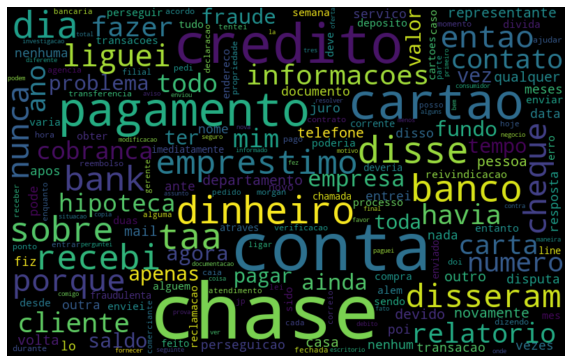

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt

###Aplicando o primeiro round de modelos

In [73]:
#Vetorização do Dataset

from sklearn.feature_extraction.text import CountVectorizer

vetorizer = CountVectorizer(lowercase=False)
vector_01 = vetorizer.fit_transform(df.normalizacao)
print(vector_01.shape)

(21072, 41219)


In [80]:
#Dividindo o dataset entre Treino e Teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    vector_01, df.classificacao, test_size=0.25, random_state=42)

In [81]:
#Aplicando em um modelo de Regressão Logistica
from nltk.tag.api import accuracy
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_model.fit(X_train, y_train)
LR_acuracia_01 = LR_model.score(X_test, y_test)

print('A acuracia do primeiro modelo de Regressão Logistica aplicada é ',LR_acuracia_01)

A acuracia do primeiro modelo de Regressão Logistica aplicada é  0.9018602885345482


In [82]:
#E agora em um modelo de Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
MNB_acuracia_01 = MNB_model.score(X_test, y_test)

print('A acuracia do primeiro modelo de Multinomial Naive Bayes aplicada é ', MNB_acuracia_01)

A acuracia do primeiro modelo de Multinomial Naive Bayes aplicada é  0.8109339407744874


In [83]:
#E finalmente para o modelo de Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DT_model = DecisionTreeClassifier(max_depth=15, random_state=0)
DT_model.fit(X_train, y_train)
DT_acuracia_01 = DT_model.score(X_test, y_test)

print('A acuracia do primeiro modelo de Árvore de Decisão aplicada é ', DT_acuracia_01)

A acuracia do primeiro modelo de Árvore de Decisão aplicada é  0.7365223993925588


**Conclusão do primeira rodada de aplicação do modelo:** A Regressão Logistica foi a que se saiu melhor.

#Stemming and Lemmatization 

In [85]:
#Instalação dos pacotes
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet') 

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [86]:
#Iremos agora criar uma nova coluna no Dataset chamada 'Tokens' onde serão aplicadas o Stemming and Lematização
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
df['tokens'] = df.normalizacao.apply(word_tokenize)

In [87]:
#Aplicação do Stemming

rslp = RSLPStemmer()

def stemmer(line):
  return ' '.join([rslp.stem(token) for token in line])
  
df['tokens'] = df.tokens.apply(stemmer)

In [88]:
#Aplicação do Lematização

df['tokens'] = [WordNetLemmatizer().lemmatize(w) for w in df['tokens']]

In [89]:
df.head(5)

,categoria,descricao_reclamacao,classificacao,normalizacao,tokens
id_reclamacao,,,,,
3229299,Hipotecas / Empréstimos,"Bom dia, meu nome é e agradeço se você puder...",3,bom dia nome agradeco puder ajudar acabar serv...,bom dia nom agradec pud ajud acab serv membr c...
3199379,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão em //2018 e fui informa...,1,atualizei cartao 2018 informado agente fez atu...,atualiz carta 2018 inform agent fez atualizaca...
3233499,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em //2019. No enta...,1,cartao chase relatado 2019 entanto pedido frau...,carta chas relat 2019 entant ped fraudulent en...
3180294,Cartão de crédito / Cartão pré-pago,"Em //2018, enquanto tentava reservar um ticket...",1,2018 enquanto tentava reservar ticket deparei ...,2018 enquant tent reserv ticket dep ofert 300 ...
3224980,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos...",0,neto cheque 1600 00 depositei conta chase fund...,net chequ 1600 00 deposit cont chas fund limp ...


###Aplicando o segundo round de modelos, agora na coluna 'Tokens'

In [103]:
#Vetorização do Dataset
vetorizer = CountVectorizer(lowercase=False)
vector_02 = vetorizer.fit_transform(df.tokens)
print(vector_02.shape)

(21072, 18634)


In [104]:
#Dividindo o dataset entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    vector_02, df.classificacao, test_size=0.25, random_state=42)

In [105]:
#Modelo de Regressão Logistica
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_model.fit(X_train, y_train)
LR_acuracia_02 = LR_model.score(X_test, y_test)

print('A acuracia do segundo modelo de Regressão Logistica aplicada é ',LR_acuracia_02)

A acuracia do segundo modelo de Regressão Logistica aplicada é  0.8714882308276386


In [106]:
#Modelo de Multinomial Naive Bayes
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
MNB_acuracia_02 = MNB_model.score(X_test, y_test)

print('A acuracia do segundo modelo de Multinomial Naive Bayes aplicada é ', MNB_acuracia_02)

A acuracia do segundo modelo de Multinomial Naive Bayes aplicada é  0.8109339407744874


In [107]:
#Modelo de Árvore de Decisão
DT_model = DecisionTreeClassifier(max_depth=15, random_state=0)
DT_model.fit(X_train, y_train)
DT_acuracia_02 = DT_model.score(X_test, y_test)

print('A acuracia do segundo modelo de Árvore de Decisão aplicada é ', DT_acuracia_02)

A acuracia do segundo modelo de Árvore de Decisão aplicada é  0.7369020501138952


**Conclusão do segunda rodada de aplicação do modelo:** Após a aplicação dos processos de Stemming and Lematização, notou-se que a acurácia caiu muito em relação a primeira tentativa. Sendo assim, iremos aplicar outros tratamentos sem esses processos.

#Vectorização com TF-IDF

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
#Aplicando a vetorizaçao apenas em Unigrams 
tfidf = TfidfVectorizer(ngram_range=(1,1))

vector_tfidf = tfidf.fit_transform(df['normalizacao'])
X_train, X_test, y_train, y_test = train_test_split(
    vector_tfidf, df.classificacao, test_size=0.25, random_state=42)

LR_model.fit(X_train, y_train)
LR_acuracia_03 = LR_model.score(X_test, y_test)

MNB_model.fit(X_train, y_train)
MNB_acuracia_03 = MNB_model.score(X_test, y_test)

DT_model.fit(X_train, y_train)
DT_acuracia_03 = DT_model.score(X_test, y_test)

print('A acuracia do terceiro modelo de Regressão Logistica aplicada é ',LR_acuracia_03)
print('A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é ', MNB_acuracia_03)
print('A acuracia do terceiro modelo de Árvore de Decisão aplicada é ', DT_acuracia_03)

A acuracia do terceiro modelo de Regressão Logistica aplicada é  0.9060364464692483
A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é  0.7367122247532271
A acuracia do terceiro modelo de Árvore de Decisão aplicada é  0.7574031890660592


In [114]:
#Aplicando a vetorizaçao com Unigrams e Bigrams
tfidf = TfidfVectorizer(ngram_range=(1,2))

vector_tfidf = tfidf.fit_transform(df['normalizacao'])
X_train, X_test, y_train, y_test = train_test_split(
    vector_tfidf, df.classificacao, test_size=0.25, random_state=42)

LR_model.fit(X_train, y_train)
LR_acuracia_03 = LR_model.score(X_test, y_test)

MNB_model.fit(X_train, y_train)
MNB_acuracia_03 = MNB_model.score(X_test, y_test)

DT_model.fit(X_train, y_train)
DT_acuracia_03 = DT_model.score(X_test, y_test)

print('A acuracia do terceiro modelo de Regressão Logistica aplicada é ',LR_acuracia_03)
print('A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é ', MNB_acuracia_03)
print('A acuracia do terceiro modelo de Árvore de Decisão aplicada é ', DT_acuracia_03)

A acuracia do terceiro modelo de Regressão Logistica aplicada é  0.8955960516324981
A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é  0.7350037965072134
A acuracia do terceiro modelo de Árvore de Decisão aplicada é  0.7596810933940774


In [112]:
#Aplicando a vetorizaçao apenas em Bigrams
tfidf = TfidfVectorizer(ngram_range=(2,2))

vector_tfidf = tfidf.fit_transform(df['normalizacao'])
X_train, X_test, y_train, y_test = train_test_split(
    vector_tfidf, df.classificacao, test_size=0.25, random_state=42)

LR_model.fit(X_train, y_train)
LR_acuracia_03 = LR_model.score(X_test, y_test)

MNB_model.fit(X_train, y_train)
MNB_acuracia_03 = MNB_model.score(X_test, y_test)

DT_model.fit(X_train, y_train)
DT_acuracia_03 = DT_model.score(X_test, y_test)

print('A acuracia do terceiro modelo de Regressão Logistica aplicada é ',LR_acuracia_03)
print('A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é ', MNB_acuracia_03)
print('A acuracia do terceiro modelo de Árvore de Decisão aplicada é ', DT_acuracia_03)

A acuracia do terceiro modelo de Regressão Logistica aplicada é  0.7873955960516325
A acuracia do terceiro modelo de Multinomial Naive Bayes aplicada é  0.7291192103264996
'A acuracia do terceiro modelo de Árvore de Decisão aplicada é  0.5298025816249051


#Usando a Biblioteca Spacy

In [ ]:
# Instalação dos pacotes Spacy
!pip install spacy==3.2.0
!python -m spacy download pt_core_news_sm

In [126]:
import spacy
pt = spacy.load('pt_core_news_sm')

nltk.download('punkt')
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from matplotlib import pyplot

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [146]:
df['tokens_2'] = df.normalizacao.apply(word_tokenize)

In [134]:
W2V_model = Word2Vec(df['tokens_2'], size=100, min_count=1, sg=0)

In [ ]:
vector_tfidf = tfidf.fit_transform(df['tokens_2'])
X_train, X_test, y_train, y_test = train_test_split(
    df.tokens_2, df.classificacao, test_size=0.25, random_state=42)

LR_model.fit(X_train, y_train)
LR_acuracia_04 = LR_model.score(X_test, y_test)

print('A acuracia do terceiro modelo de Regressão Logistica aplicada é ',LR_acuracia_04)

####**Validação do professor**

Consolidar apenas os scripts do seu **modelo campeão**, desde o carregamento do dataframe, separação das amostras, tratamentos utilizados (funções, limpezas, etc.), criação dos objetos de vetorização dos textos e modelo treinado e outras implementações utilizadas no processo de desenvolvimento do modelo.

### Confusion Matrix do melhor modelo

In [149]:
from sklearn.metrics import confusion_matrix, classification_report

tfidf = TfidfVectorizer(ngram_range=(1,1))

vector_tfidf = tfidf.fit_transform(df['normalizacao'])
X_train, X_test, y_train, y_test = train_test_split(
    vector_tfidf, df.classificacao, test_size=0.25, random_state=42)

LR_model.fit(X_train, y_train)
LR_acuracia_03 = LR_model.score(X_test, y_test)

LG_pred = LR_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, LG_pred)
print(conf_matrix)

print(classification_report(y_test, LG_pred))

[[1212   25   44   11   11]
 [  24 1179   60   15   12]
 [  60   42 1068   22   12]
 [  22   23   16  851   10]
 [  14   18   23   31  463]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1303
           1       0.92      0.91      0.92      1290
           2       0.88      0.89      0.88      1204
           3       0.92      0.92      0.92       922
           4       0.91      0.84      0.88       549

    accuracy                           0.91      5268
   macro avg       0.91      0.90      0.90      5268
weighted avg       0.91      0.91      0.91      5268

